# メタ学習のPACベイズ

参考
* [PAC-Bayesian Meta-Learning: From Theory to Practice](https://arxiv.org/abs/2211.07206)



* データの分布：$\mathcal{D}$
    * そのドメインを$\mathcal{Z}$とする
    * データから$m$個の観測をサンプルする：$S=\{z_i\}_{i=1}^m$ （$S \sim \mathcal{D}^m$で略記）
* $z_i=(x_i, y_i)$：$x_i \in \mathcal{X}$は入力，$y_i \in \mathcal{Y}$は出力
* ゴール：$S$を与えられたときに，仮説集合$\mathcal{H}$から，新しい入力$x^* \mathcal{D}_x$に対して予測をする仮説$h\in \mathcal{H}$を学習したい．
    * 損失関数：$l: \mathcal{H}\times \mathcal{Z}\to \mathbb{R}$
    * 期待損失：$\mathcal{L}(h, \mathcal{D})=\mathbb{E}_{z^*\sim \mathcal{D}} l(h, z^*)$
    * 経験損失：$\hat{\mathcal{L}}(h, \mathcal{D})=\frac{1}{m}\sum^{m}_{i=1}l(h, z^*)$
* PACベイズでの仮説集合上の確率測度
    * $P\in \mathcal{M}(\mathcal{H})$：事前分布．データと独立．
    * $Q\in \mathcal{M}(\mathcal{H})$：事後分布．データに依存しても良い．
    * Gibbs誤差：$\mathcal{L}(Q, \mathcal{D})=\mathbb{E}_{h \sim Q} \mathcal{L}(h, \mathcal{D})$
        * その経験版：$\hat{\mathcal{L}}(Q, S)=\mathbb{E}_{h \sim Q} \hat{\mathcal{L}}(h, S)$
* 中心キュムラント母関数：
    * 確率変数$X$，分布$\nu$，実関数$f$について，$\Psi_{\nu, f(\cdot)}(t)=\ln \mathbb{E}_{X \sim \nu}\left[e^{t(f(X)-\mathbb{E}[f(X)])}\right]$で定義される．
    * $X\sim \nu$なる確率変数$f(X)$がどれだけその期待値から外れているかを表す量．$f(X)$がUnboundedなときの集中不等式で便利．
  

PACベイズのバウンドとして以下が知られています：

---

**Alquierのバウンド**

$\beta > 0$について，
$$
\mathcal{L}(Q, \mathcal{D}) \leq \hat{\mathcal{L}}(Q, S)+\frac{1}{\beta}\left[D_{K L}(Q \| P)+\ln \frac{1}{\delta}+\Psi(\beta, m)\right]
$$
が成り立つ．ここで，$\Psi(\beta, m)=\ln \mathbb{E}_P \mathbb{E}_{\mathcal{D}^m} \exp [\beta(\mathcal{L}(h, \mathcal{D})-\hat{\mathcal{L}}(h, S))]$．

$\Psi$は$\hat{\mathcal{L}}$についての中心キュムラント母関数．これは一般に未知だが，損失関数が特定の形（Bdoundedなど）の場合，簡単にバウンド可能．

---

Alquierのバウンドの右辺を最小にするような事後分布$Q$は[Catoniのバウンド](MATH_PAC_Bayes.ipynb)で与えられます．


## メタ学習

メタ学習の設定
* 学習者は事前分布$P$を所持し，新しいタスクに直面すると，そのデータ$S$を使って事後分布$Q$を得ます
    * これは$Q(S, P)$として書く．ここで，$Q: \mathcal{Z}^m \times \mathcal{M}(\mathcal{H}) \rightarrow \mathcal{M}(\mathcal{H})$
    * メタ学習では，良い事前分布$P$をデータによって事前に学習するのが目標です．
        * 学習用の$n$個のタスク$\left\{\tau_1, \ldots, \tau_n\right\}$
        * それぞれのタスクからは$m_i=m$個のデータをサンプルします．
        * タスクは$\tau_i \sim \mathcal{T}$からi.i.dにサンプルされます．
* hyper-prior（事前分布の事前分布）：$\mathcal{P} \in \mathcal{M}(\mathcal{M}(\mathcal{H}))$
* hyper-posterior（事前分布の事後分布）：$\mathcal{Q}$
    * この性能は次の転移誤差で評価します：$\mathcal{L}(\mathcal{Q}, \mathcal{T}):=\mathbb{E}_{P \sim \mathcal{Q}}\left[\mathbb{E}_{(\mathcal{D}, m) \sim \mathcal{T}}\left[\mathbb{E}_{S \sim \mathcal{D}^m}[\mathcal{L}(Q(S, P), \mathcal{D})]\right]\right]$
    * 経験転移誤差：$\hat{\mathcal{L}}\left(\mathcal{Q}, S_1, \ldots, S_n\right):=\mathbb{E}_{P \sim \mathcal{Q}}\left[\frac{1}{n} \sum_{i=1}^n \hat{\mathcal{L}}\left(Q\left(S_i, P\right), S_i\right)\right]$

---

**メタ学習のPACベイズバウンド**

$\delta \in (0, 1]$に対して，

$$
\begin{aligned}
\mathcal{L}(\mathcal{Q}, \mathcal{T}) \leq & \hat{\mathcal{L}}\left(\mathcal{Q}, S_1, \ldots, S_n\right)+\left(\frac{1}{\lambda}+\frac{1}{n \beta}\right) D_{K L}(\mathcal{Q} \| \mathcal{P}) \\
& +\frac{1}{n} \sum_{i=1}^n \frac{1}{\beta} \mathbb{E}_{P \sim \mathcal{Q}}\left[D_{K L}\left(Q\left(S_i, P\right) \| P\right)\right]+\underbrace{\Psi^I(\beta)+\Psi^{I I}(\lambda)+\frac{1}{\sqrt{n}} \ln \frac{1}{\delta}}_{:=C(\delta, \lambda, \beta)}
\end{aligned}
$$

が任意のhyper posterior $\mathcal{Q} \in \mathcal{M}(\mathcal{M}(\mathcal{H}))$ について，確率$1-\delta$で成立します．
ここで，$\bar{\Psi}^I(\beta)$は中心キュムラント母艦数 
$$\Psi^I(\beta)=\frac{\beta}{m} \log \mathbb{E}_{\mathcal{P}} \mathbb{E}_P \mathbb{E}_{\mathcal{D}}\left[e^{\frac{\beta}{m}(\mathcal{L}(h, \mathcal{D})-l(h, z))}\right]$$ 
の上界であり，
$$\Psi^{I I}(\lambda)=\frac{n}{\lambda} \log \mathbb{E}_{\mathcal{P}} \mathbb{E}_{\mathcal{T}_h}\left[e^{\frac{\lambda}{n} \mathbb{E}_{\mathcal{T}_h} \mathbb{E}_{\mathcal{P}}[\mathcal{L}(Q(P, S), \mathcal{D})]-\mathcal{L}(Q(P, S), \mathcal{D})}\right] \leq \bar{\Psi}^{I I}(\lambda)$$
とします．

---

よって，あとは$\Psi^I$と$\Psi^{II}$をバウンドするだけです．
これは損失関数の形式によって様々な形でバウンドされます．
例えば損失関数が$[a, b]$で有界である場合，

$$
\bar{\Psi}^I(\beta)+\bar{\Psi}^{I I}(\lambda)=\left(\frac{\lambda}{8 n}+\frac{\beta}{8 m}\right)(b-a)^2
$$

になります．


## 実験

論文中の簡単な実験をやってみましょう．

### 二値分類

簡単な二値分類タスクをやってみます．

* ラベル：$\mathcal{Y}=\{0, 1\}$
* 仮説集合：$\mathcal{H}=\{h_w(x)=\mathbf{1}(w^\top x \leq 0 \mid w \in \mathbb{R}^d)\}$
* 最終的にバウンドしたい損失（ミスった回数）：$l(w, x, y)=1(h_w(x)\neq y) \in [0, 1].$

---

**データ生成**

* タスクの分布：$\mathcal{T}=\mathcal{N}\left(\mu_{\mathcal{T}}, \sigma_{\mathcal{T}}^2 \mathbf{I}\right)$ with $\mu_{\mathcal{T}}=10 \cdot \mathbf{1}$ and $\sigma_{\mathcal{T}}=3 \cdot \mathbf{1}$
    * $\mathbf{w}_i^* \in \mathbb{R}^d$をここからサンプル
* 入力：$p(\mathbf{x})=\mathcal{U}\left([-1,1]^d\right)$ からサンプル
* 出力：$p(y=1 \mid \mathbf{x})=g\left(\mathbf{w}^{\top} \mathbf{x}\right)$からサンプル
* 評価：$m=5$個のデータをそれぞれのタスクで評価

---

**評価**

* Gibbs Posterior：$i$番目のデータセット$S_i$と事前分布$P$が与えられたときに出力する最適な事後分布（$\beta = \sqrt{m}$のとき）
    * 事後分布を構築するための損失：$l(\mathbf{w}, \mathbf{x}, y)=-y \log g\left(\mathbf{w}^{\top} \mathbf{x}\right)-(1-y) \log \left(1-g\left(\mathbf{w}^{\top} \mathbf{x}\right)\right)$
        * $g(\mathbf{z}):=1 /(1+\exp (-\mathbf{z}))$はロジスティック関数
    * 重み上の事前分布：$P_{\mu_P, \sigma_P^2}(\mathbf{w})=\mathcal{N}\left(\mathbf{w} \mid \mu_P, \sigma_P^2\right)$
        * $\mu_P$は学習可能
        * $\sigma^2_P$は固定

$$
Q(S_i, P)(w) = Q_i(\mathbf{w})\propto P_{\mu_P, \sigma_P^2}(\mathbf{w}) \exp\left(-\frac{1}{\sqrt{m}} \sum_{j=1}^m l\left(\mathbf{w}, \mathbf{x}_{i j}, y_{i j}\right)\right)
$$

今回は事前分布としてガウス分布を使っているので，

$$
Q_i(\mathbf{w}) \propto \exp\left(-\frac{(\mathbf{w}-\mu_P)^2}{2\sigma_P^2} - \frac{1}{\sqrt{m}} \sum_{j=1}^m l\left(\mathbf{w}, \mathbf{x}_{i j}, y_{i j}\right)\right)
$$

* 最終的にメタ学習の性能は次で評価します：

$$
\mathcal{L}(\mathcal{Q}, \mathcal{T}):=\mathbb{E}_{P \sim \mathcal{Q}} \mathbb{E}_{(\mathcal{D}, S) \sim \mathcal{T}_h}[\mathcal{L}(Q(S, P), \mathcal{D})]
$$


---

**事前分布の学習**

* 事前分布の事前分布：$\mathcal{P}\left(\mu_P\right)=\mathcal{N}\left(\mu_P \mid \mathbf{0}, \sigma_{\mathcal{P}}^2\right)$
    * 事前分布の事後分布（hyper-posterior）を学習するのがゴール．

$$
\mathcal{Q}^*(P)=\frac{\mathcal{P}(P) \exp \left(\frac{\lambda}{n \beta+\lambda} \sum_{i=1}^n \log Z_\beta\left(S_i, P\right)\right)}{Z^{I I}\left(S_1, \ldots, S_n, \mathcal{P}\right)}
$$

ここで$Z_\beta(S, P)=\int_{\mathcal{H}} P(h) e^{-\beta \hat{\mathcal{L}}(h, S)} d h$は正規化項です．
$\hat{\mathcal{L}}(h, S)=\frac{1}{m} \sum_{i=1}^m l\left(h, z_i\right)$としました．

今回は$P$は平均パラメータ$\mu_P$で確定するので，$\mathcal{Q}^*(P)$は$\mu_P$上の分布になります．
事前分布の事前分布の形式と合わせると，

$$
\mathcal{Q}^*(P)=
\mathcal{Q}^*(\mu_P)
\propto
\exp\left(-\frac{\mathbf{w}^2}{2\sigma^2_P} + \frac{\sqrt{n}}{n\sqrt{m} + \sqrt{n}}\sum_{i=1}^n \log Z_\beta\left(S_i, P\right)\right)
$$

ここで$\lambda=\sqrt{n}$としました．

---


In [146]:
# Meta 2値分類 with PAC-Bayes

import numpy as np
import jax.numpy as jnp
import jax
import chex


key = jax.random.PRNGKey(0)


d = 2  # featureの次元
m = 5  # データ数


# >>>> データ生成の関数 >>>>

# タスクの生成 (== w の生成)

@jax.jit
def create_task(key):
    key, key_ = jax.random.split(key)
    mu_T = 10.0
    sigma_T = 3.0
    w = jax.random.normal(key_, (2,)) * sigma_T + mu_T
    return key, w


@jax.jit
def create_dataset(key, w):
    # 入力の生成

    def create_input(key):
        key, key_ = jax.random.split(key)
        x = jax.random.uniform(key_, (m, d), minval=-1, maxval=1)
        chex.assert_shape(x, (m, d))
        return key, x

    # ラベルの生成
    def create_label(key, x, w):
        key, key_ = jax.random.split(key)
        p = jax.nn.sigmoid(x @ w)  # m次元ベクトル
        chex.assert_shape(p, (m,))
        label = jax.random.bernoulli(key_, p)
        return key, label

    key, x = create_input(key)
    key, y = create_label(key, x, w)
    return key, x, y


key, w = create_task(key)
key, x, y = create_dataset(key, w)

# <<<< データ生成の関数 <<<<


# >>>> 評価のための関数 >>>>

w_min, w_max = -10, 10  # 事後分布計算用のハイパラ
rsl = 30


@jax.jit
def compute_expected_losses(x, y, ws):
    # x: (m, d) 次元ベクトル
    # y: d 次元ベクトル
    # ws: (-, d)  次元ベクトル
    g = jax.nn.sigmoid(x @ ws.T)  # (m, -)
    y = y.reshape(-1, 1)
    losses = - (y * jnp.log(g + 1e-8)) - ((1 - y) * jnp.log(1 - g + 1e-8))
    return losses.sum(axis=0) / jnp.sqrt(m) 


@jax.jit
def compute_posterior(x, y, mu, sigma):
    w1 = jnp.linspace(w_min, w_max, rsl)
    w2 = jnp.linspace(w_min, w_max, rsl)
    ws = jnp.array([jnp.tile(w1, rsl), jnp.repeat(w2, rsl)]).T  # 離散化したwのテーブル

    losses = compute_expected_losses(x, y, ws).reshape(-1, 1)
    chex.assert_rank(losses, 2)
    log_density = - ((ws - mu) ** 2) / (2 * sigma ** 2) - losses
    dist = jnp.exp(log_density).prod(axis=-1)
    normalizer = dist.sum(axis=0, keepdims=-1)
    dist = dist / normalizer

    return ws, dist


ws, dist = compute_posterior(x, y, 0.3, 10)

# <<<< 評価のための関数 <<<<


# >>>> 事前分布の事後分布の計算 >>>>


mu_min, mu_max = -5, 5  # 事後分布計算用のハイパラ
mu_rsl = 20

@jax.jit
def compute_sum_Z(xs, ys, mu, sigma):
    w1 = jnp.linspace(w_min, w_max, rsl)
    w2 = jnp.linspace(w_min, w_max, rsl)
    ws = jnp.array([jnp.tile(w1, rsl), jnp.repeat(w2, rsl)]).T  # 離散化したwのテーブル

    vmaped_compute_expected_losses = jax.vmap(compute_expected_losses, in_axes=(0, 0, None))
    losses = vmaped_compute_expected_losses(xs, ys, ws)
    chex.assert_rank(losses, 2)

    n = len(xs)  # タスクの数

    log_density = - ((ws.reshape(1, *ws.shape) - mu) ** 2) / (2 * sigma ** 2) - losses.reshape(n, -1, 1)
    Z = jnp.exp(log_density).sum(axis=1) / jnp.sqrt(2 * jnp.pi * sigma ** 2)

    sn, sm = jnp.sqrt(n), jnp.sqrt(m)
    sum_Z = (sn / (n * sm + sn)) * jnp.log(Z).sum(axis=0)
    return sum_Z


vmaped_compute_sum_Z = jax.vmap(compute_sum_Z, in_axes=(None, None, 0, None))


@jax.jit
def compute_hyper_posterior(xs, ys, sigma):
    mu1 = jnp.linspace(mu_min, mu_max, mu_rsl)
    mu2 = jnp.linspace(mu_min, mu_max, mu_rsl)
    mus = jnp.array([jnp.tile(mu1, mu_rsl), jnp.repeat(mu2, mu_rsl)]).T  # 離散化したmuのテーブル

    sum_Zs = vmaped_compute_sum_Z(xs, ys, mus, sigma)
    log_density = - (mus ** 2) / (2 * sigma ** 2) + sum_Zs
    dist = jnp.exp(log_density).prod(axis=-1)
    dist = dist / dist.sum(axis=0)
    return mus, dist


# <<<< 事前分布の事後分布の計算 <<<<


# >>>> 汎化性能の評価 >>>>

def evaluate(num_task, key, train_sigma=10, test_sigma=20):
    create_tasks = jax.vmap(create_task)
    create_datasets = jax.vmap(create_dataset)
    keys = jax.random.split(key, num_task)
    _, task_ws = create_tasks(keys)
    key, key_ = jax.random.split(key)
    keys = jax.random.split(key_, num_task)
    _, xs, ys = create_datasets(keys, task_ws)
    mus, mu_dist = compute_hyper_posterior(xs, ys, train_sigma)

    # それぞれのmuについて，タスクとデータセットをサンプルして評価します
    key, key1, key2 = jax.random.split(key, num=3)
    keys = jax.random.split(key1, len(mus))
    _, task_ws = create_tasks(keys)  # mu個タスクをサンプル
    keys = jax.random.split(key2, len(mus))
    _, xs, ys = create_datasets(keys, task_ws)  # mu個データセットをサンプル
    compute_posteriors = jax.vmap(compute_posterior, in_axes=(0, 0, 0, None))
    ws, dist = compute_posteriors(xs, ys, mus, test_sigma)

    preds = (xs.reshape(-1, 1, m, d) * ws.reshape(-1, rsl**2, 1, 2)).sum(axis=-1) <= 0
    accuracy = preds == ys.reshape(-1, 1, m)
    accuracy = accuracy.mean(axis=-1)

    np.testing.assert_allclose(mu_dist.sum(), 1.0, rtol=1e-6)
    np.testing.assert_allclose(dist.sum(axis=-1), 1.0, rtol=1e-6)

    error = ((accuracy * dist).sum(axis=-1) * mu_dist).sum()
    return error

# <<<< 汎化性能の評価 <<<<
evaluate(10, key)

Array(0.09592456, dtype=float32)

In [159]:
num_tasks = jnp.logspace(0, 2, num=30)
errors = []

for num_task in num_tasks:
    key, key_ = jax.random.split(key)
    errors.append(evaluate(int(num_task), key_))


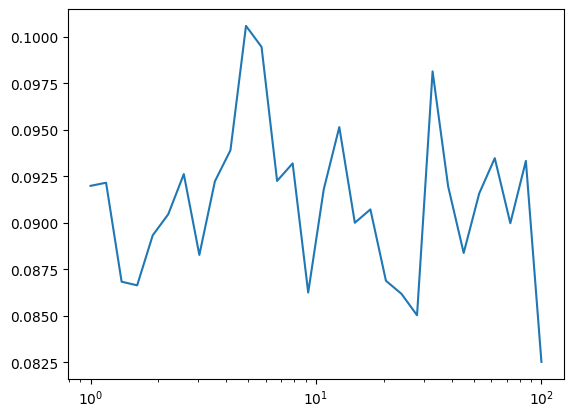

In [160]:
import matplotlib.pyplot as plt

plt.plot(num_tasks, errors)
plt.xscale("log")